<center>
    <img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60%">
    <h1> INF280 - Estadística Computacional </h1>
    <h2> Generación de Variables Aleatorias </h2>
    <h2> Version: 0.02 </h2>
    <h2> Ay. Nicolás Armijo Calquín </h2> 
    <h2> Ay. Eva Wang Liu </h2>
</center>

<div id='toc'>

## Tabla de Contenidos

* [Pseudo-aleatoriedad](#pseudo_aleatoriedad)
* [Generación de datos aleatorios en Python](#generacion_datos_aleatorios_python)
    * [NumPy Random](#numpy_random)
        * [Semilla](#semilla)
        * [Datos aleatorios](#datos_aleatorios)
        * [Elecciones aleatorias](#elecciones_aleatorias)
        * [Distribuciones estadísticas](#numpy_distribuciones_estadisticas)
    * [SciPy Stats](#scipy_stats)
        * [Distribuciones estadísticas](#scipy_distribuciones_estadisticas)
        * [PDF y CDF](#pdf_cdf)
* [Método de la transformada lineal](#metodo_transformada_lineal)
* [Referencias](#referencias)
* [Historial de versiones](#hist)

<div id='intro'>

## Introducción

Cuando intentamos modelar situaciones de la vida real, nos encontramos con el desafío de que estas se ajustan a distribuciones complejas y específicas. Las variables aleatorias suelen seguir distribuciones de probabilidad que reflejan fenómenos específicos, por lo que hacer uso de ellas permite que nuestros modelos se acerquen más a la realidad.

En palabras simples, para simular variables aleatorias debemos generar números uniformes y transformarlos a valores de una distribución de probabilidad mediante una función específica. Aunque en la actualidad múltiples módulos en lenguajes de programación permiten la realización de este proceso rápidamente, también existen varios procedimientos para lograr este procedimiento manualmente, tales como el método de la transformada inversa.

En el presente Jupyter Notebook, exploraremos los distintos métodos y funciones que residen en las librerías Random, NumPy y Scipy en Python que nos permiten generar datos aleatorios. Por último, también revisaremos el método de la transformada lineal para la generación de variables aleatorias.

Antes de partir, importaremos las librerías que complementarán nuestro trabajo:

In [1]:
# Importamos librerías complementarias
import pandas as pd
import matplotlib.pyplot as plt

<div id='pseudo-aleatoriedad'>

## Pseudo-aleatoriedad

Cuando intentamos generar datos aleatorios mediante algoritmos computacionales, por más que estos aparenten ser y cumplan con las propiedades estadísticas esperadas, **no son realmente aleatorios**: son **pseudo-aleatorios**.

Lo anterior se debe a que los algoritmos computacionales funcionan de manera **determinista**, es decir que siguen una secuencia de pasos **reproducible** a partir de una **semilla** o valor inicial. Por lo tanto, dicha semilla siempre producirá la misma secuencia de números pseudo-aleatorios para distintas ejecuciones del algoritmo computacional determinista.

No obstante, los datos pseudo-aleatorios son estadísticamente indistinguibles de una secuencia realmente aleatoria, al menos para propósitos tales como las simulaciones, por lo que serán suficiente para nuestro uso.

Por brevedad, en este Jupyter Notebook describiremos como aleatorios a los datos generados con algoritmos computacionales, pero no hay que olvidar que estos son realmente pseudo-aleatorios.

<div id='generacion_datos_aleatorios_python'>

## Generación de datos aleatorios en Python

A continuación, exploraremos los módulos NumPy Random y SciPy Stats de Python, los cuales nos permiten la generación de datos (números y variables) aleatorios simples de forma rápida y eficiente.

<div id='NumPy Random'>

### NumPy Random

Random es un submódulo de NumPy que implementa generadores de números aleatorios, con la habilidad de extraer muestras de una variedad de distribuciones de probabilidad.

Se adjuntan distintos recursos que les puede ser de utilidad:

* **Documentación oficial** https://numpy.org/doc/stable/reference/random/index.html

In [2]:
# Importamos NumPy - Debemos instalarlo con pip install numpy
import numpy as np

<div id='Semilla'>

#### Semilla

Por defecto, NumPy establece la **hora** como la semilla de su algoritmo computacional a la hora de generar datos aleatorios. No obstante, podemos modificar esto haciendo uso de la función `np.random.seed`:

In [3]:
# Establecemos la semilla al número 0
np.random.seed(0)

<div id='Datos aleatorios'>

#### Datos aleatorios

Tal como fue introducido en `CH0-Pandas-NumPy`, algunas funciones de NumPy que nos permiten generar números aleatorios de forma simple son:

* `np.random.randint`: genera números aleatorios **enteros** en una **distribución uniforme**.

* `np.random.rand`: genera números aleatorios **flotantes** en una **distribución uniforme** $[0,1)$.

* `np.random.random_sample`: hace lo mismo que la función anterior. Tiene varios alias:
    * `np.random.random`.
    * `np.random.sample`.
    * `np.random.ranf`.

In [4]:
# Generamos un ndarray de 100 números aleatorios en una distribución uniforme en el intervalo [0, 50)
np.random.randint(low=0, high=50, size=100)

array([44, 47,  0,  3,  3, 39,  9, 19, 21, 36, 23,  6, 24, 24, 12,  1, 38,
       39, 23, 46, 24, 17, 37, 25, 13,  8,  9, 20, 16,  5, 15, 47,  0, 18,
       35, 24, 49, 29, 19, 19, 14, 39, 32,  1,  9, 32, 31, 10, 23, 35, 11,
       28, 34,  0,  0, 36,  5, 38, 40, 17, 15,  4, 41, 42, 31,  1,  1, 39,
       41, 35, 38, 11, 46, 18, 27,  0, 14, 35, 12, 42, 20, 11,  4,  6,  4,
       47,  3, 12, 36, 40, 14, 15, 20, 35, 23, 15, 13, 21, 48, 49])

<div id='Elecciones_aleatorias'>

#### Elecciones aleatorias

NumPy también nos permite mezclar un arreglo aleatoriamente o elegir aleatoriamente en un arreglo mediante las siguientes funciones:

* `np.random.choice`: genera una muestra aleatoria a partir de un arreglo.

* `np.random.shuffle`: modifica un arreglo mezclando su contenido.

* `np.random.permutation`: genera un nuevo arreglo permutado.

In [5]:
# Escogemos una muestra aleatoria en un arreglo
np.random.choice(["Rojo", "Azul", "Amarillo"])

'Azul'

<div id='numpy_distribuciones_estadisticas'>

#### Distribuciones estadísticas

Para la generación de variables aleatorias, NumPy proporciona varias funciones dependiendo de la distribución de probabilidad que estas siguen. Algunas de estas funciones son:

* `np.random.uniform`: genera muestras de una **distribución uniforme**.

* `np.random.normal`: genera muestras de una **distribución normal** (gaussiana).

* `np.random.exponential`: genera muestras de una **distribución exponencial**.

* `np.random.binomial`: genera muestras de una **distribución binomial**.

* `np.random.poisson`: genera muestras de una **distribución de Poisson**.

* `np.random.multivariate_normal`: genera muestras de una **distribución normal multivariada**.

In [6]:
# Generamos 10 muestras de una distribución uniforme en el intervalo [0, 55)
np.random.uniform(low=0, high=55, size=10)

array([10.81202989, 20.27988439, 45.15462764,  5.34057017, 46.08696991,
        5.28541243, 53.70527058, 25.77581609, 53.72185985, 33.26650359])

<div id='scipy_stats'>

### SciPy Stats

Stats es un submódulo de Scipy que, al igual que Random de NumPy, se dedica a la generación de variables aleatorias. No obstante, ofrece una funcionalidad estadística más avanzada: contiene una gran cantidad de distribuciones de probabilidad, resumen y estadísticas de frecuencia, entre otros.

Se adjuntan distintos recursos que les puede ser de utilidad:

* **Documentación oficial** https://docs.scipy.org/doc/scipy/reference/stats.html

In [7]:
# Importamos Scipy - Debemos instalarlo con pip install scipy
import scipy

<div id='scipy_distribuciones_estadisticas'>

#### Distribuciones estadísticas

Para generar muestras aleatorias en distribuciones estadísticas usando SciPy, ocupamos el método `rvs` sobre la distribución estadística que es de nuestro interés:

* `scipy.stats.uniform.rvs`: genera muestras de una **distribución uniforme**.

* `scipy.stats.norm.rvs`: genera muestras de una **distribución normal** (gaussiana).

* `scipy.stats.expon.rvs`: genera muestras de una **distribución exponencial**.

* `scipy.stats.binom.rvs`: genera muestras de una **distribución binomial**.

* `scipy.stats.poisson.rvs`: genera muestras de una **distribución de Poisson**.

* `scipy.stats.multivariate_normal.rvs`: genera muestras de una **distribución normal multivariada**.

In [8]:
# Generamos 10 muestras de una distribución uniforme en el intervalo [0, 55] 
scipy.stats.uniform.rvs(loc=0, scale=55, size=10)

array([40.65949687,  2.15532857, 15.55438294,  6.61081087, 16.28771086,
        6.53002454, 17.48907487, 22.7844647 ,  3.5281123 , 38.08596657])

<div id='pdf_cdf'>

#### PDF y CDF

Los siguientes métodos de SciPy también nos pueden resultar de utilidad:

* `pdf`: genera una **función de densidad de probabilidad (pdf)**.

* `cdf`: genera una **función de distribución acumulada (cdf)**.

Estos métodos funcionan de manera análoga al método `rvs` revisado anteriormente; es decir, se aplican sobre la distribución estadística que es de nuestro interés.

<div id='metodo_transformada_inversa'>

## Método de la transformada inversa

El método de la transformada inversa es una técnica para generar variables aleatorias a partir de la transformación de números uniformes a valores de una distribución de probabilidad mediante una función específica. Este método aprovecha la propiedad de las funciones de probabilidad acumulada, en las cuales su recorrido siempre se encontrará en el intervalo cerrado $[0,1]$.

Supongamos que queremos generar una variable aleatoria $X$ la cual tiene una función de probabilidad que sigue:

$$P(X=x_j)=\left\{\begin{array}{lr} x_0    & p_0 \\ \\
                                    x_1    & p_1 \\ \\
                                    x_2    & p_2 \\ \\
                                    \vdots &     \\ \\
                                    x_n    & p_n \end{array}\right.$$

Nuestra misión es generar eventos aleatorios $X = x_j$ tal que cumpla con la función de probabilidad. Para esto nos apoyaremos en 
los números aleatorios y en la función de distribución de $X$ la cual denotaremos como $F_x$.

Generaremos un número aleatorio $U$ que siga una distribución uniforme $(0,1)$, es decir, $U \sim U(0,1)$. Luego de esto, 
aprovecharemos la siguiente propiedad: dados $a,b$ que cumplan $0<a<b<1$, se tiene que $P\{a\leq U<b\}=b-a$. Con esta propiedad 
en mente, contruimos la función de probabilidad anterior de la siguiente forma:

$$P\{X=x_i\}=\left\{\sum_{i=0}^{j-1}p_i\leq U<\sum_{i=0}^{j}p_i\right\}=p_j$$

Entonces, podemos generar $X$ siguiendo la siguiente regla:

$$X=\left\{\begin{array}{lcc} x_0    & si & U   \leq p_0                                \\ \\
                              x_1    & si & p_0 \leq U<p_0+p_1                          \\ \\
                              \vdots &    &                                             \\ \\
                              x_j    & si & \sum_{i=0}^{j-1}p_i\leq U<\sum_{i=0}^{j}p_i \\
                              \vdots &    &                                             \end{array}\right.$$

Por último, si tenemos los $x_i$ ordenados tal que, $x_1<x_2<\cdots$, tendremos que $X$ será $x_j$ si $F_X(x_{j-1})\leq U<F_X(x_j)
$.

En resumen, este método consiste en los siguientes 3 pasos:

1. Generar un número aleatorio $u$ (computacionalmente son pseudo-aleatorios), tal que siga una distribución uniforme $(0,1)$, es decir $u\sim U(0,1)$.

2. Hallar la inversa de la función de probabilidad acumulada $F^{-1}_X(x)$.

3. Finalmente, calcular $X=F^{-1}_X(u)$. Así habremos generado $X=x$ que siga la distribución de $F_X$.

A continuación, se presentará un ejemplo introductorio al método de la transformada inversa.

<div id='metodo_transformada_inversa_ejemplo'>

### Ejemplo

Queremos simular una variable aleatoria $X$ tal que $p_1 = 0.10$, $p_2 = 0.25$, $p_3 = 0.60$, $p_4 = 0.05$

In [9]:
# Creamos un DataFrame de Pandas para llevar la cuenta de ocurrencia de cada variable x_i
# Se crean 4 DataFrames para llevar el registro de 4 simulaciones distintas
X_1 = pd.DataFrame({'count': [0,0,0,0]}, index=['x_1','x_2','x_3','x_4'])
X_2 = pd.DataFrame({'count': [0,0,0,0]}, index=['x_1','x_2','x_3','x_4'])
X_3 = pd.DataFrame({'count': [0,0,0,0]}, index=['x_1','x_2','x_3','x_4'])
X_4 = pd.DataFrame({'count': [0,0,0,0]}, index=['x_1','x_2','x_3','x_4'])

X_1

,count
x_1,0
x_2,0
x_3,0
x_4,0


In [10]:
# Método de la transformada inversa
def generator(df):
    # Utilizamos NumPy para generar un número pseudoaleatorio de distribución uniforme(0,1)
    U = np.random.random()
    # Dependiendo del intervalo de U, generamos x_i utilizando F_X
    if U < 0.1:
        df['count']['x_1'] += 1
    elif U < 0.35:
        df['count']['x_2'] += 1
    elif U < 0.95:
        df['count']['x_3'] += 1
    else:
        df['count']['x_4'] += 1
    return

In [11]:
## Definimos la función sim para simular nuestro algoritmo n veces y así analizar la distribución de las variables generadas
def sim(n, X):
    for i in range(n):
        generator(X)
    return

A continuación, vamos a realizar distintas simulaciones para ver cómo se comporta nuestro generador de variables aleatorias, y si 
este en realidad genera las variables con la probabilidad exigida.

In [12]:
# Simulamos 100 veces y calculamos la probabilidad de cada x_i
sim(100, X_1)
X_1 /= 100

X_1

,count
x_1,0.09
x_2,0.23
x_3,0.63
x_4,0.05


In [13]:
# Simulamos 1000 veces y calculamos la probabilidad de cada x_i
sim(1000, X_2)
X_2 /= 1000

X_2

,count
x_1,0.099
x_2,0.269
x_3,0.570
x_4,0.062


In [14]:
## Simulamos 10000 veces y calculamos la probabilidad de cada x_i
sim(10000, X_3)
X_3 /= 10000

X_3

,count
x_1,0.1021
x_2,0.2528
x_3,0.5975
x_4,0.0476


In [15]:
## Simulamos 100000 veces y calculamos la probabilidad de cada x_i
sim(100000, X_4)
X_4 /= 100000

X_4

,count
x_1,0.10093
x_2,0.24897
x_3,0.60023
x_4,0.04987


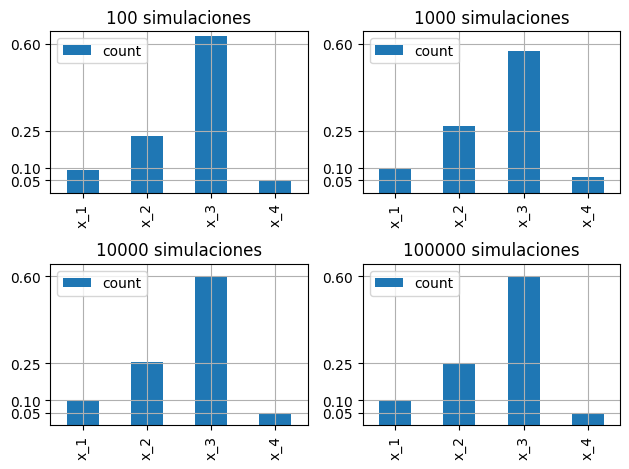

In [16]:
marcas = [0.05,0.10,0.25,0.60]
ylim = [0.0, 0.65]

fig, ax = plt.subplots(2,2)

X_1.plot.bar(ax= ax[0,0], grid= True, yticks=marcas, ylim= ylim)
X_2.plot.bar(ax= ax[0,1], grid= True, yticks=marcas, ylim= ylim)
X_3.plot.bar(ax= ax[1,0], grid= True, yticks=marcas, ylim= ylim)
X_4.plot.bar(ax= ax[1,1], grid= True, yticks=marcas, ylim= ylim)

ax[0,0].set_title("100 simulaciones")
ax[0,1].set_title("1000 simulaciones")
ax[1,0].set_title("10000 simulaciones")
ax[1,1].set_title("100000 simulaciones")

plt.tight_layout()
plt.show()

Podemos observar que nuestro generador cumple su función, y a medida que aumentamos la magnitud del orden de simulaciones, la probabilidad empírica tiende a nuestra probabilidad teórica.

Se adjuntan 2 gráficos que representan la idea detrás del método de la transformada inversa, tanto la VA discretas como continuas:

* <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1f/FDC-Geometrica.pdf/page1-610px-FDC-Geometrica.pdf.jpg?20201101071844"/>

* <img src="https://upload.wikimedia.org/wikipedia/commons/7/74/Inversion_method2.svg"/> 

<div id='referencias'>

## Referencias

* Ross, S. M. (2019). *Generating Discrete Random Variables*. En *Simulation* (pp. 49-66).

<div id='hist'>

# Historial de Versiones 

* **Versión v0.02:** Primera versión del material. - *3 de Septiembre del 2024*. 